## 🏠 House Price Prediction using Linear Regression
📌 Project Objective:
This notebook aims to predict house prices using linear regression techniques, applying both simple and multiple linear regression models on a structured dataset. The primary goal is to understand how different features (like area, bedrooms, furnishing status, etc.) affect the house price and evaluate model performance accordingly.

📊 Dataset Description:
The dataset contains various housing features and the target variable price (house price). Each row corresponds to a house listing. The dataset is suitable for supervised regression tasks.

| Feature Name       | Description                                                      |
| ------------------ | ---------------------------------------------------------------- |
| `area`             | Area of the house in square feet                                 |
| `bedrooms`         | Number of bedrooms                                               |
| `bathrooms`        | Number of bathrooms                                              |
| `stories`          | Number of floors                                                 |
| `mainroad`         | Whether the house is on a main road (`yes`/`no`)                 |
| `guestroom`        | Presence of guest room (`yes`/`no`)                              |
| `basement`         | Whether the house has a basement                                 |
| `hotwaterheating`  | Availability of hot water heating                                |
| `airconditioning`  | Whether the house has air conditioning                           |
| `parking`          | Number of parking spaces                                         |
| `prefarea`         | Is the house in a preferred area                                 |
| `furnishingstatus` | Furnishing status (`furnished`, `semi-furnished`, `unfurnished`) |
| `price`            | **Target variable** – selling price of the house                 |



Some of the categorical features were encoded using LabelEncoder.

📈 What is Linear Regression?
Linear Regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship:

price
=
𝛽
0
+
𝛽
1
⋅
area
+
𝛽
2
⋅
bedrooms
+
⋯
+
𝜀
price=β 
0
​
 +β 
1
​
 ⋅area+β 
2
​
 ⋅bedrooms+⋯+ε
Simple Linear Regression uses one feature to predict the price (e.g., area).

Multiple Linear Regression uses multiple features to make better predictions.

⚙️ Workflow Summary:
Data Preprocessing

Handled categorical variables using LabelEncoder

Applied MinMaxScaler to normalize area

Applied np.log() transformation on price to address right-skew

Modeling

Trained simple and multiple linear regression models using sklearn

Evaluated performance using MSE, MAE, and R²

Visualized regression lines and residuals

Post-processing

Converted predictions back from log-scale using np.exp()

📌 Interpretation of Coefficients:
Each coefficient in a linear regression model tells us the change in house price associated with a 1-unit change in the corresponding feature, keeping all other features constant.

Example:

If the coefficient of area is 85, then for every 1 sq. ft. increase in area, the predicted price increases by ₹85.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-price-prediction/Housing.csv


In [3]:
df = pd.read_csv("/kaggle/input/housing-price-prediction/Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

So there is no missing data present which is good

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
set(df['bathrooms'])

{1, 2, 3, 4}

In [8]:
set(df['stories'])

{1, 2, 3, 4}

In [9]:
set(df['parking'])

{0, 1, 2, 3}

In [11]:
df1 = df.copy()

In [12]:
from sklearn.preprocessing import LabelEncoder
def encoding(df,col):
    label_e = LabelEncoder()
    encoded = label_e.fit_transform(df[col])
    return label_e,encoded

In [13]:
label_main ,df1['mainroad'] = encoding(df1,'mainroad')
label_guest,df1['guestroom'] = encoding(df1,'guestroom')
label_base,df1['basement']=encoding(df1,'basement')
label_hot,df1['hotwaterheating']=encoding(df1,'hotwaterheating')
label_air,df1['airconditioning']=encoding(df1,'airconditioning')
label_pre,df1['prefarea']=encoding(df1,'prefarea')
label_fur,df1['furnishingstatus']=encoding(df1,'furnishingstatus')




In [14]:
# Function to print label mappings
def print_label_mapping(label_encoder, label_name):
    print(f"\n{label_name} mapping:")
    for i, class_ in enumerate(label_encoder.classes_):
        print(f"  {class_} → {i}")

# Print all mappings
print_label_mapping(label_main, "mainroad")
print_label_mapping(label_guest, "guestroom")
print_label_mapping(label_base, "basement")
print_label_mapping(label_hot, "hotwaterheating")
print_label_mapping(label_air, "airconditioning")
print_label_mapping(label_pre, "prefarea")
print_label_mapping(label_fur, "furnishingstatus")


mainroad mapping:
  no → 0
  yes → 1

guestroom mapping:
  no → 0
  yes → 1

basement mapping:
  no → 0
  yes → 1

hotwaterheating mapping:
  no → 0
  yes → 1

airconditioning mapping:
  no → 0
  yes → 1

prefarea mapping:
  no → 0
  yes → 1

furnishingstatus mapping:
  furnished → 0
  semi-furnished → 1
  unfurnished → 2


In [15]:
df1.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,2
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,2


In [16]:
df1.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [19]:
df1['price'].max(),df1['price'].min(),df1['price'].mean(),df1['price'].median(),df1['price'].mode()

(13300000,
 1750000,
 4766729.247706422,
 4340000.0,
 0    3500000
 1    4200000
 Name: price, dtype: int64)

## Checking For Outliers

We know in linear regression presence of outlier messes up the linear regression model so it is best to remove outlier before we train a simple linear regression model..

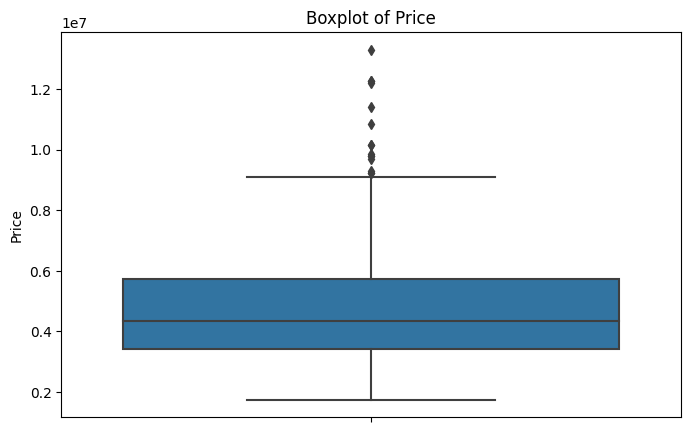

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, y='price')
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()


In [33]:
def remove_outlier(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    high=q3+1.5*iqr
    return df[ (df[col]>=lower) & (df[col]<=high) ]
df1 = remove_outlier(df1,'price')
    

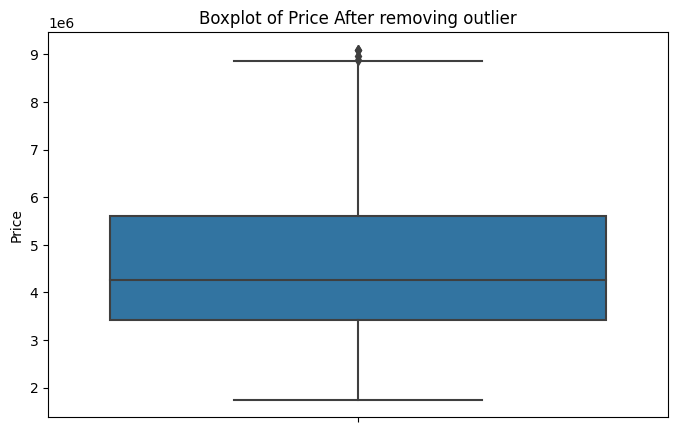

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, y='price')
plt.title('Boxplot of Price After removing outlier')
plt.ylabel('Price')
plt.show()

In [37]:
without_price = df1.drop('price',axis=1)

<Axes: >

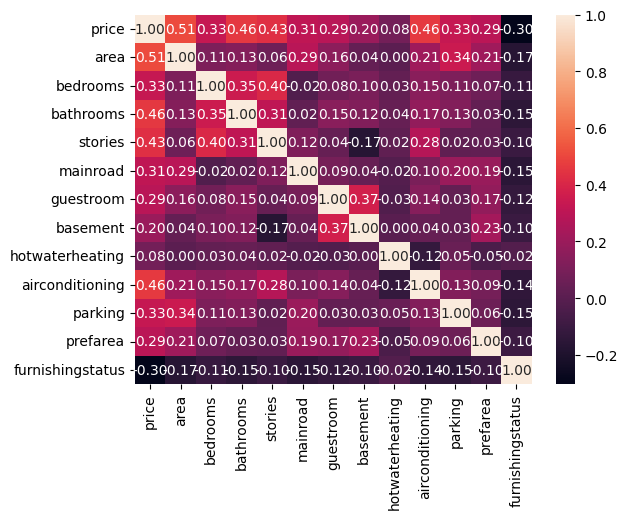

In [122]:
sns.heatmap(df1.corr(),annot=True,fmt='.2f')

<Axes: >

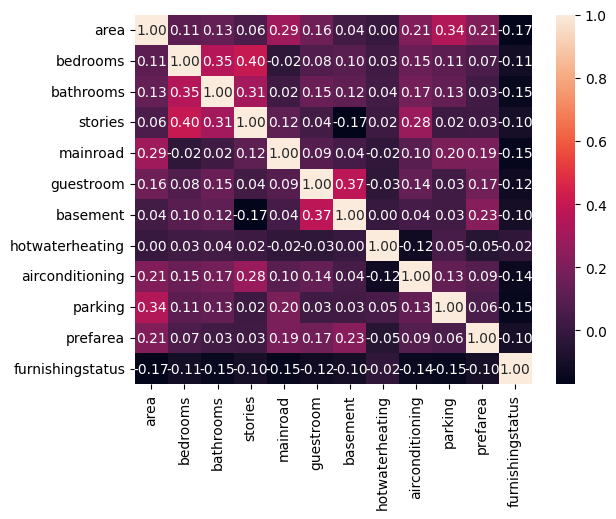

In [38]:
sns.heatmap(without_price.corr(),annot=True,fmt='.2f')

## Normalize the price and area

In [46]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
df1['area'] = s.fit_transform(df1[['area']])  # Note the double brackets [[area]]


/tmp/ipykernel_35/1931397542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['area'] = s.fit_transform(df1[['area']])  # Note the double brackets [[area]]


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


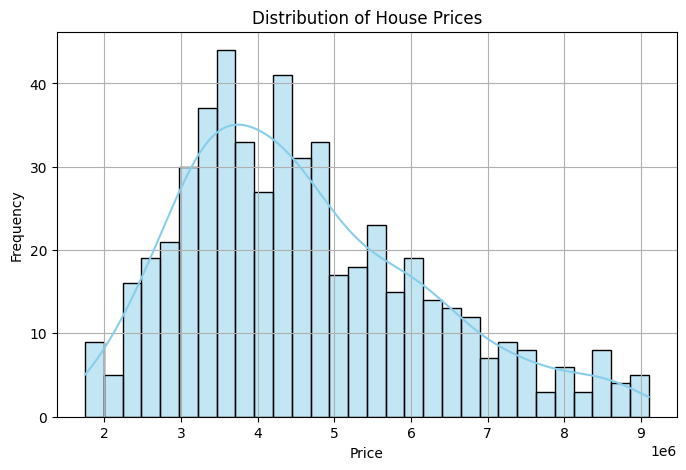

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df1['price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


We see that our price distribution is right skewed which will cause problem in the performance of linear regression i.e When the target variable is skewed, residuals also tend to be skewed → bad fit, biased coefficients, inaccurate confidence intervals.

## Log Transformation

In [60]:
X,y1 = df1.drop('price',axis=1),df1['price']
y = np.log(y1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

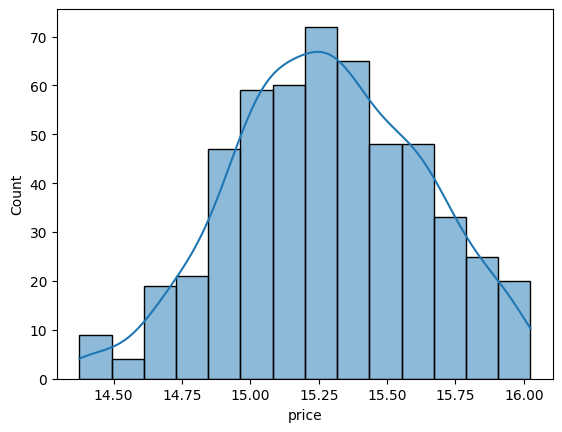

In [61]:
sns.histplot(y,kde=True)

In [62]:
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,0.311828,4,1,2,1,0,1,0,0,2,0,1
16,9100000,0.354839,4,2,2,1,1,1,0,1,1,1,2
17,8960000,0.491039,3,2,4,1,0,0,0,1,2,0,0
18,8890000,0.211470,3,2,2,1,1,0,0,1,2,0,0
19,8855000,0.341935,3,2,2,1,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.096774,2,1,1,1,0,1,0,0,2,0,2
541,1767150,0.053763,3,1,1,0,0,0,0,0,0,0,1
542,1750000,0.141219,2,1,1,1,0,0,0,0,0,0,2
543,1750000,0.090323,3,1,1,0,0,0,0,0,0,0,0


## Split the data into train and test

In [67]:
from sklearn.model_selection import train_test_split


# Split data: 80% train, 20% test in log space
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



## Train the MULTIPLE LINEAR REGRESSION model

In [105]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [106]:
model.score(X_test,y_test)

0.6436952709815857

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Train errors
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

# Test errors
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))


Train MSE: 0.0367294274081735
Train MAE: 0.1497063857677745
Train R2: 0.6587254508997005
Test MSE: 0.060323840314897965
Test MAE: 0.18327868974251463
Test R2: 0.6436952709815857


## SIMPLE LINEAR REGRESSION MODEL

### Training Simple Linear Regression Model using feature Area

In [114]:
x = X[['area']]

In [116]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [117]:
# Create linear regression model
model1 = LinearRegression()

# Train the model
model1.fit(X_train1, y_train1)

# Print coefficients
print("Intercept:", model1.intercept_)
print("Coefficient for 'area':", model1.coef_[0])



Intercept: 15.009527150442448
Coefficient for 'area': 1.1005899412553533


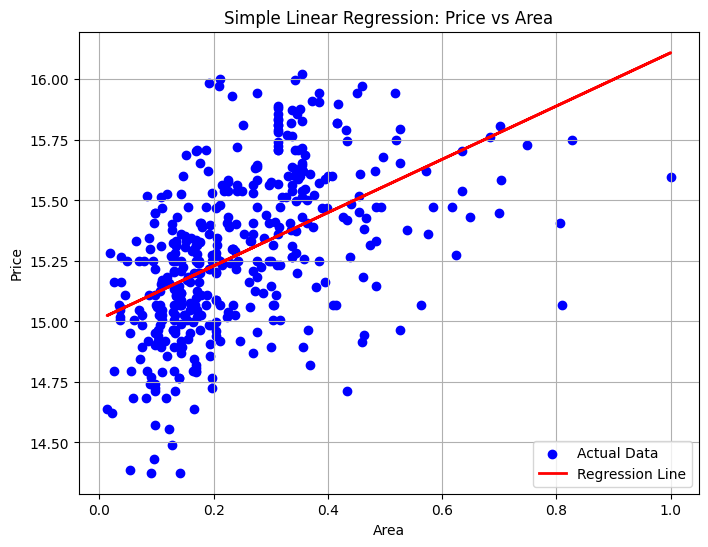

In [119]:
import matplotlib.pyplot as plt

# Assuming X_train and y_train are from:
# X = df1[['area']]
# y = df1['price']

# Predict on training data to draw the regression line
y_train_pred = model1.predict(X_train1)

plt.figure(figsize=(8, 6))
plt.scatter(X_train1, y_train1, color='blue', label='Actual Data')
plt.plot(X_train1, y_train_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Price vs Area')
plt.legend()
plt.grid(True)
plt.show()
